<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [1]:
student_number = ''
first_name = 'Mohammad'
last_name = 'Mowlavi'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install cvxopt


# Data Prepfocessing

Import your needed libraries in following cell.

In [4]:
# TODO: Write your code here
import pandas as pd

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable.

In [5]:
# TODO: Write your code here
df = pd.read_csv('/content/drive/MyDrive/satimage.csv')
features = df.drop(columns=['label'])
labels = df['label']
print("Features:")
print(features.head())
print("\nLabels:")
print(labels.head())

Features:
      0         1         2         3         4         5          6       7  \
0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   

        8         9  ...        26        27        28        29        30  \
0 -2.2500  0.077672  ... -0.517241 -0.600000 -0.138462 -0.188119 -0.431579   
1 -2.2500  0.077672  ... -0.517241 -0.600000 -0.015385 -0.049505 -0.431579   
2  3.4375  6.368924  ...  0.103448 -0.233333  0.200000  0.207921 -0.010526   
3 -3.8750 -2.368924  ... -0.011494 -0.383333 -0.138462 -0.049505 -0.347368   
4 -0.6250 -1.320388  ...  0.287356 -0.183333  0.230769  0.267327 -0.031579   

         31       32        33        34

Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [6]:
# TODO: Write your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Train set shape:", X_train_scaled.shape, y_train.shape)
print("Validation set shape:", X_val_scaled.shape, y_val.shape)
print("Test set shape:", X_test_scaled.shape, y_test.shape)

Train set shape: (3861, 36) (3861,)
Validation set shape: (965, 36) (965,)
Test set shape: (1609, 36) (1609,)


We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [7]:
# TODO: Write your code here
import numpy as np

X_train_binary = X_train_scaled[(y_train == 4) | (y_train == 6)]
y_train_binary = y_train[(y_train == 4) | (y_train == 6)]

y_train_binary = np.where(y_train_binary == 4, 1, -1)

X_val_binary = X_val_scaled[(y_val == 4) | (y_val == 6)]
y_val_binary = y_val[(y_val == 4) | (y_val == 6)]
y_val_binary = np.where(y_val_binary == 4, 1, -1)

X_test_binary = X_test_scaled[(y_test == 4) | (y_test == 6)]
y_test_binary = y_test[(y_test == 4) | (y_test == 6)]
y_test_binary = np.where(y_test_binary == 4, 1, -1)

print("Binary Train set shape:", X_train_binary.shape, y_train_binary.shape)
print("Binary Validation set shape:", X_val_binary.shape, y_val_binary.shape)
print("Binary Test set shape:", X_test_binary.shape, y_test_binary.shape)


Binary Train set shape: (1266, 36) (1266,)
Binary Validation set shape: (330, 36) (330,)
Binary Test set shape: (538, 36) (538,)


# Model (50 points)

Here is soft margin svm convex optimization formulation.
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

\begin{align*}
\max_{\mathbf{a}} \left( \sum_{n=1}^{N} a_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} a_n a_m y^{(n)} y^{(m)} x^{(n)T}  x^{(m)} \right)
\end{align*}

\begin{align*}
\text{Subject to:}
&\sum_{n=1}^{N} a_n y^{(n)} = 0, \\
&0 \leq a_n \leq C, \quad \forall n \in \{1, \ldots, N\}.
\end{align*}


Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [5]:
import cvxopt
import cvxopt.solvers

In [24]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here
    N = X.shape[0]
    K = np.dot(X, X.T)
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-1 * np.ones(N))
    A = cvxopt.matrix(y, (1, N), 'd')
    b = cvxopt.matrix(0.0)

    G = cvxopt.matrix(np.vstack((-np.eye(N), np.eye(N))))
    h = cvxopt.matrix(np.hstack((np.zeros(N), C * np.ones(N))))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x'])

    sv_indices = alphas > 1e-5
    support_vectors = X[sv_indices.flatten()]
    support_vector_alphas = alphas[sv_indices]
    support_vector_labels = y[sv_indices.flatten()]

    return support_vectors, support_vector_labels, support_vector_alphas


In [25]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary, C)

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  2e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  1e-13
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  1e-13
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  1e-13
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  1e-13
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  1e-13
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  1e-13
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  1e-13
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  1e-13
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  1e-13
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  1e-13
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  1e-13
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  2e-13
Optimal solution found.


In [26]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    output:
        y_pred: predictoin labels
    """

    # TODO: Write your code here

    y_pred = []
    for x in x_test:
        prediction = 0
        for i in range(len(support_vectors)):
            prediction += support_vector_alphas[i] * support_vector_labels[i] * np.dot(support_vectors[i], x)
        y_pred.append(np.sign(prediction))
    return y_pred

In [27]:
y_pred = predict_labels(np.array(X_test_binary), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [6]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test_binary, y_pred)

# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 1], yticklabels=[-1, 1])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

Accuracy:  0.8252788104089219
Balanced Accuracy:  0.7639855133496167
Confusion Matrix:
 [[348  35]
 [ 59  96]]


<Axes: >

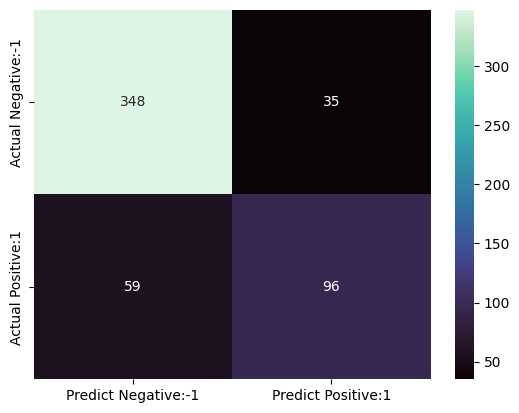

In [32]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [66]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    output = np.exp(-gamma * (np.linalg.norm(x1 - x2) ** 2))
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here
    N = X.shape[0]
    K = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-1 * np.ones(N))
    A = cvxopt.matrix(y, (1, N), 'd')
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((-np.eye(N), np.eye(N))))
    h = cvxopt.matrix(np.hstack((np.zeros(N), C * np.ones(N))))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x'])

    sv_indices = alphas > 1e-5
    support_vectors = X[sv_indices.flatten()]
    support_vector_alphas = alphas[sv_indices]
    support_vector_labels = y[sv_indices.flatten()]

    return support_vectors, support_vector_labels, support_vector_alphas

In [40]:
gammas = [0.01, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best_balanced_accuracy = 0

for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary, C, gamma)

    y_val_pred = predict_labels(X_val_binary, support_vectors, support_vector_labels, support_vector_alphas)

    balanced_accuracy = balanced_accuracy_score(y_val_binary, y_val_pred)

    if balanced_accuracy > best_balanced_accuracy:
        best_balanced_accuracy = balanced_accuracy
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas

print("Best gamma is: ", best_gamma)

     pcost       dcost       gap    pres   dres
 0: -5.7870e+02 -3.1897e+03  2e+04  3e+00  2e-14
 1: -4.0863e+02 -2.0634e+03  2e+03  2e-01  1e-14
 2: -4.2109e+02 -6.8997e+02  3e+02  2e-02  1e-14
 3: -4.6476e+02 -5.9584e+02  1e+02  8e-03  1e-14
 4: -4.8769e+02 -5.5091e+02  7e+01  3e-03  1e-14
 5: -4.9596e+02 -5.3660e+02  4e+01  2e-03  1e-14
 6: -5.0371e+02 -5.2370e+02  2e+01  8e-04  1e-14
 7: -5.0860e+02 -5.1604e+02  8e+00  2e-04  2e-14
 8: -5.1083e+02 -5.1270e+02  2e+00  4e-05  2e-14
 9: -5.1160e+02 -5.1168e+02  8e-02  4e-07  2e-14
10: -5.1164e+02 -5.1164e+02  6e-03  1e-08  2e-14
11: -5.1164e+02 -5.1164e+02  3e-04  6e-10  2e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5478e+02 -2.9645e+03  1e+04  3e+00  6e-15
 1: -2.5774e+02 -1.8143e+03  2e+03  1e-01  5e-15
 2: -2.7515e+02 -5.5668e+02  3e+02  2e-02  4e-15
 3: -3.1035e+02 -4.0746e+02  1e+02  5e-03  4e-15
 4: -3.2161e+02 -3.7676e+02  6e+01  2e-03  4e-15
 5: -3.3186e+02 -3.4879e+02  2e+01  3e-04  5e-1

In [41]:
y_pred = predict_labels(np.array(X_test_binary), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test_binary, y_pred)

Accuracy:  0.8085501858736059
Balanced Accuracy:  0.7426345489766697
Confusion Matrix:
 [[344  39]
 [ 64  91]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [8]:
df = pd.read_csv('/content/drive/MyDrive/satimage.csv')
features = df.drop(columns=['label'])
labels = df['label']
print("Features:")
print(features.head())
print("\nLabels:")
print(labels.head())

Features:
      0         1         2         3         4         5          6       7  \
0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   

        8         9  ...        26        27        28        29        30  \
0 -2.2500  0.077672  ... -0.517241 -0.600000 -0.138462 -0.188119 -0.431579   
1 -2.2500  0.077672  ... -0.517241 -0.600000 -0.015385 -0.049505 -0.431579   
2  3.4375  6.368924  ...  0.103448 -0.233333  0.200000  0.207921 -0.010526   
3 -3.8750 -2.368924  ... -0.011494 -0.383333 -0.138462 -0.049505 -0.347368   
4 -0.6250 -1.320388  ...  0.287356 -0.183333  0.230769  0.267327 -0.031579   

         31       32        33        34

In [22]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    return accuracy, balanced_accuracy, confusion_mat

In [51]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
# TODO: Write your code here
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf')

param_grid = {'C': Cs, 'gamma': gammas}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print("Best C:", best_C)
print("Best gamma:", best_gamma)

best_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)
accuracy, balanced_accuracy, confusion_mat = evaluate_model(y_test, y_pred)

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Confusion Matrix:\n", confusion_mat)

Best C: 10
Best gamma: 0.01
Accuracy: 0.9028749028749029
Balanced Accuracy: 0.8664762388974546
Confusion Matrix:
 [[298   0   0   0   3   0]
 [  2 144   0   1   3   1]
 [  4   1 267   6   1   2]
 [  0   1  34  59   4  13]
 [  0   1   1   1 124  14]
 [  0   0   9  15   8 270]]


Implement Multiclass SVM from scratch without using ready functions (optional).

**I used rbf kernel function for this part as above problem**

In [173]:
import numpy as np


class SoftMarginSVM:
    def __init__(self, C=1.0, gamma=1.0):
        self.C = C
        self.gamma = gamma

    def fit(self, X, y):
        N = X.shape[0]
        K = np.dot(X, X.T)
        P = cvxopt.matrix(np.outer(y, y) * K)
        q = cvxopt.matrix(-1 * np.ones(N))
        A = cvxopt.matrix(y, (1, N), 'd')
        b = cvxopt.matrix(0.0)

        G = cvxopt.matrix(np.vstack((-np.eye(N), np.eye(N))))
        h = cvxopt.matrix(np.hstack((np.zeros(N), self.C * np.ones(N))))

        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.array(solution['x'])

        sv_indices = alphas > 1e-5
        self.support_vectors = X[sv_indices.flatten()]
        # print(self.support_vectors)
        self.support_vector_alphas = alphas[sv_indices]
        self.support_vector_labels = y[sv_indices.flatten()]

    def dicision_function(self, x):
        y = np.array(x)
        decision_values = 6
        for alpha, sv, sv_label in zip(self.support_vector_alphas, self.support_vectors, self.support_vector_labels):
            if not isinstance(sv, str) :
                # print(type(sv))
                decision_values += float(alpha) * float(sv_label) * np.dot(sv, y)
        return decision_values


class MulticlassSVM:
    def __init__(self, C=1.0, gamma=1.0):
        self.C = C
        self.gamma = gamma
        self.classifiers = {}

    def fit(self, X_train, y_train):
        classes = np.unique(y_train)
        for cls in classes:
            y_binary = np.where(y_train == cls, 1, -1)
            svm = SoftMarginSVM(C=self.C, gamma=self.gamma)
            svm.fit(X_train, y_binary)
            self.classifiers[cls] = svm

    def predict(self, X_test):
        predictions = []

        i = 0
        for i in range(len(X_test)):
            max_confidence = float('-inf')
            predicted_class = None
            for cls, svm in self.classifiers.items():
                confidence = svm.dicision_function(X_test.iloc[i])
                if confidence > max_confidence:
                    max_confidence = confidence
                    predicted_class = cls
            i += 1
            predictions.append(predicted_class)
        return np.array(predictions)


In [174]:
print(set(labels[:100]))

{1.0, 2.0, 3.0, 5.0, 6.0}


In [175]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features[:1000], labels[:1000], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multiclass_svm = MulticlassSVM()
multiclass_svm.fit(X_train, y_train)
y_pred = multiclass_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Balanced Accuracy:", balanced_accuracy)
print("Confusion Matrix:\n", confusion_mat)

Balanced Accuracy: 0.16666666666666666
Confusion Matrix:
 [[35  0  0  0  0  0]
 [15  0  0  0  0  0]
 [23  0  0  0  0  0]
 [16  0  0  0  0  0]
 [24  0  0  0  0  0]
 [87  0  0  0  0  0]]


# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

Linear Kernel:
Accuracy: 0.8702408702408703
Balanced Accuracy: 0.8250254022511502


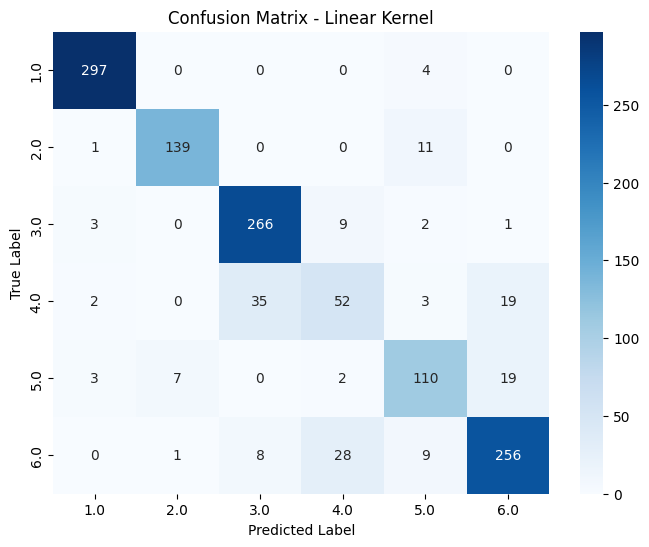

In [23]:
# TODO: Write your code here
svc_linear = SVC(kernel='linear', C=10)
svc_linear.fit(X_train, y_train)
y_pred_linear = svc_linear.predict(X_test)
accuracy_linear, balanced_accuracy_linear, confusion_mat_linear = evaluate_model(y_test, y_pred_linear)

print("Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Balanced Accuracy:", balanced_accuracy_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_linear, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Linear Kernel")
plt.show()

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

RBF Kernel:
Accuracy: 0.9028749028749029
Balanced Accuracy: 0.8664762388974546


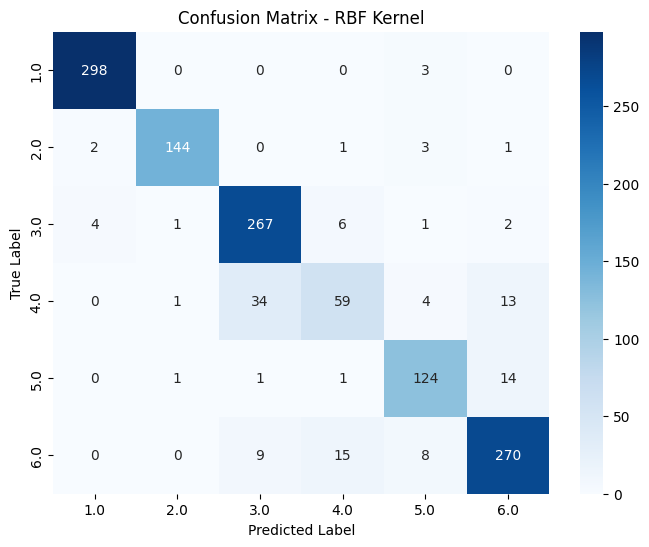

In [24]:
# TODO: Write your code here
svc_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
accuracy_rbf, balanced_accuracy_rbf, confusion_mat_rbf = evaluate_model(y_test, y_pred_rbf)

print("RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Balanced Accuracy:", balanced_accuracy_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RBF Kernel")
plt.show()

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Polynomial Kernel:
Accuracy: 0.9028749028749029
Balanced Accuracy: 0.8731838698714193


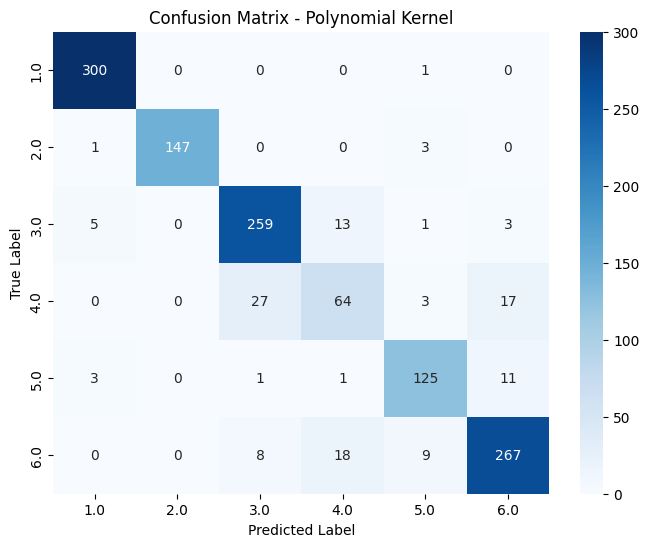

In [25]:
# TODO: Write your code here
# Create SVC classifier with polynomial kernel
svc_poly = SVC(kernel='poly', degree=3, gamma=0.01, C=10)
svc_poly.fit(X_train, y_train)
y_pred_poly = svc_poly.predict(X_test)
accuracy_poly, balanced_accuracy_poly, confusion_mat_poly = evaluate_model(y_test, y_pred_poly)

print("Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Balanced Accuracy:", balanced_accuracy_poly)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_poly, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Polynomial Kernel")
plt.show()


### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Sigmoid Kernel:
Accuracy: 0.578088578088578
Balanced Accuracy: 0.5254488654249293


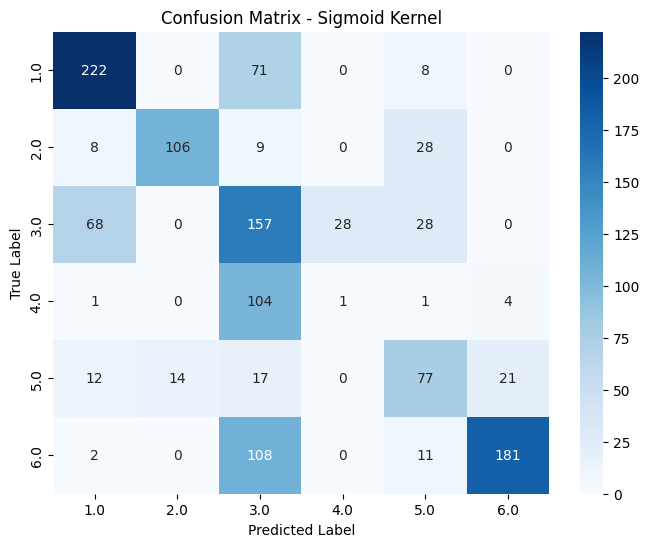

In [31]:
# TODO: Write your code here
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test)
accuracy_sigmoid, balanced_accuracy_sigmoid, confusion_mat_sigmoid = evaluate_model(y_test, y_pred_sigmoid)

print("Sigmoid Kernel:")
print("Accuracy:", accuracy_sigmoid)
print("Balanced Accuracy:", balanced_accuracy_sigmoid)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_sigmoid, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Sigmoid Kernel")
plt.show()

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

these kernel functions offer various trade-offs in terms of computational efficiency, flexibility, and ability to capture complex patterns in data. linear kernel is simple and efficient, suitable for linearly separable data, but struggles with non-linear datasets. The polynomial kernel captures non-linear relationships and offers flexibility in decision boundaries, but it is computationally expensive and prone to overfitting.Gaussian RBF kernel is highly flexible and capable of capturing complex non-linear patterns, but it requires significant computational resources and is sensitive to hyperparameters. The sigmoid kernel can handle non-linearly separable data but is less common and more prone to convergence issues, requiring careful hyperparameter tuning.